In [1]:
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import itertools
from tensorflow.keras.utils import load_img 
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(0)
tf.compat.v1.set_random_seed(0)

In [2]:
train_gen = image_dataset_from_directory(directory="D:/Research/data/data/train/",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="D:/Research/data/data/val/",
                                        image_size=(256, 256))
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 1951 files belonging to 4 classes.
Found 324 files belonging to 4 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [4]:
ep = 10
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22580\2431932963.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/10
61/61 [==============================] - 434s 7s/step - loss: 1.5629 - accuracy: 0.3603 - val_loss: 1.4296 - val_accuracy: 0.3117
Epoch 2/10
61/61 [==============================] - 437s 7s/step - loss: 1.1236 - accuracy: 0.5018 - val_loss: 0.9986 - val_accuracy: 0.5278
Epoch 3/10
61/61 [==============================] - 386s 6s/step - loss: 0.8317 - accuracy: 0.6530 - val_loss: 0.7099 - val_accuracy: 0.7222
Epoch 4/10
61/61 [==============================] - 415s 7s/step - loss: 0.6409 - accuracy: 0.7627 - val_loss: 0.4900 - val_accuracy: 0.7901
Epoch 5/10
61/61 [==============================] - 413s 7s/step - loss: 0.4789 - accuracy: 0.8170 - val_loss: 0.6223 - val_accuracy: 0.7623
Epoch 6/10
61/61 [==============================] - 425s 7s/step - loss: 0.4064 - accuracy: 0.8426 - val_loss: 0.2845 - val_accuracy: 0.8889
Epoch 7/10
61/61 [==============================] - 388s 6s/step - loss: 0.3634 - accuracy: 0.8560 - val_loss: 0.3685 - val_accuracy: 0.8519
Epoch 8/10
61

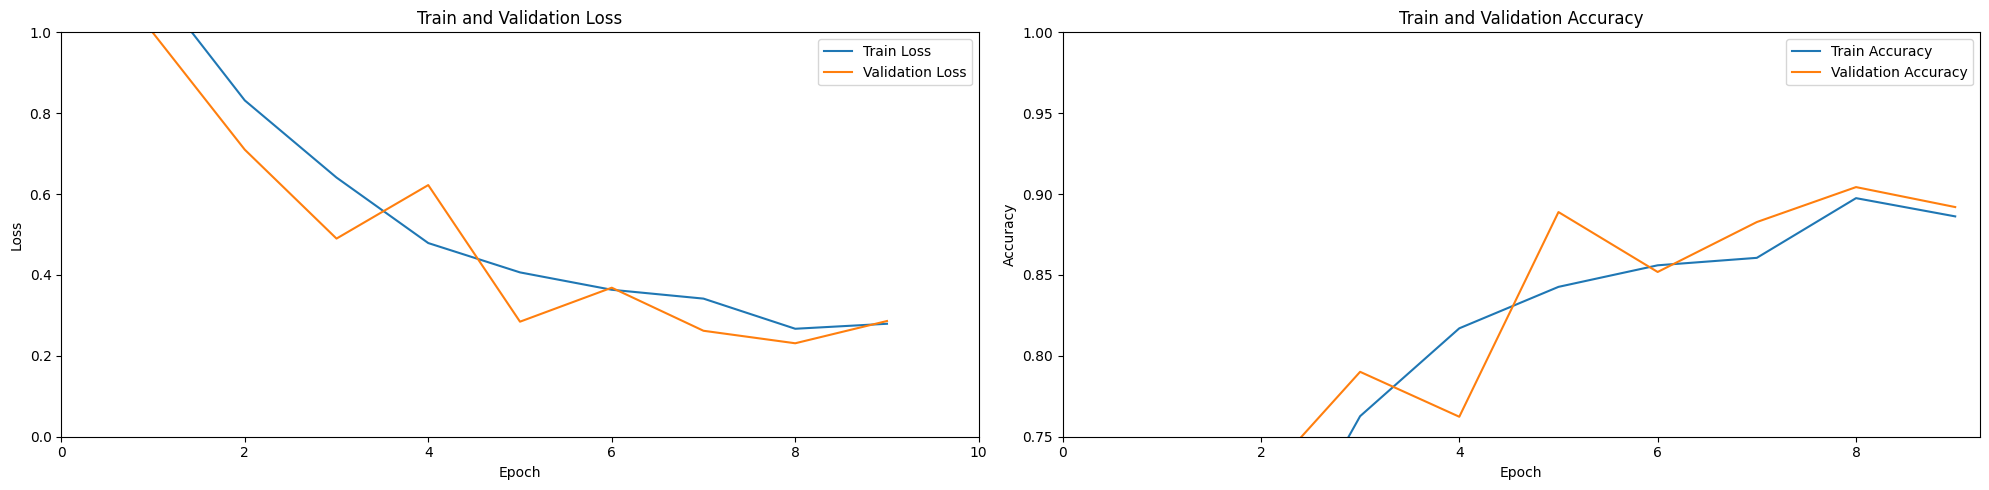

In [5]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [6]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 1s 568ms/step


In [7]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [8]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 88.62 %
Test Accuracy   : 89.20 %
Precision Score : 89.20 %
Recall Score    : 89.20 %
